# Data Access with `intake`

This notebook is part of the [tutorials](https://www.cgd.ucar.edu/events/2021/asp-colloquia/tutorials.html) in the [ASP summer school](https://www.cgd.ucar.edu/events/2021/asp-colloquia/).

In the [S2S verification tutorial](https://docs.google.com/document/d/1nQOyjjAjdqN2sl3IeJYCytCo4l_49GW6fMgkKjsnsCc/edit),
we use `climpred` https://climpred.readthedocs.io/en/stable/ to verify subseasonal-to-seasonal (S2S) forecasts against observations.

Here, we show which data for the ASP summer school is available on `casper`.

---

Intro: `intake`: Taking the pain out of data access and distribution

Intake is a lightweight package for finding, investigating, loading and disseminating data. It will appeal to different groups for some of the reasons below, but is useful for all and acts as a common platform that everyone can use to smooth the progression of data from developers and providers to users.

---

Table of Contents:

- data access with remembering paths
- data access with `intake`
- view metadata of `intake` catalog items
- access remote observations via the internet from curated catalogs

---

Resources:

- `intake`:
    - documentation: https://intake.readthedocs.io/en/latest/index.html
    - catalogs: https://intake.readthedocs.io/en/latest/catalog.html#yaml-format
- `fsspec`: for caching remote files on local disk
    - caching: https://filesystem-spec.readthedocs.io/en/latest/features.html#caching-files-locally
- example: `remote_climate_data`
    - https://github.com/aaronspring/remote_climate_data
    - subcatalogs: https://github.com/aaronspring/remote_climate_data/tree/master/catalogs

In [27]:
#!conda install intake fsspec intake-xarray -c conda-forge -y

In [3]:
import numpy as np
import xarray as xr
import intake

# remembering paths

In [19]:
data_path = '/glade/campaign/mmm/c3we/jaye/S2S_zarr'

In [88]:
!ls /glade/campaign/mmm/c3we/jaye/S2S_zarr/ | head -10

ECCC.anom.biweekly.country.zarr
ECCC.anom.biweekly.geospatial.zarr
ECCC.anom.cat_edges.biweekly.country.zarr
ECCC.anom.cat_edges.biweekly.geospatial.zarr
ECCC.anom.cat_edges.daily.country.zarr
ECCC.anom.cat_edges.daily.geospatial.zarr
ECCC.anom.country.zarr
ECCC.anom.daily.country.zarr
ECCC.anom.daily.geospatial.zarr
ECCC.climatology.biweekly.country.zarr


In [22]:
# load spatially aggregated data from /glade/scratch/jaye/S2S_zarr/
model = 'ECMWF' # ECCC, NCEP  # forecast model
data = 'anom' # raw # anom means anomaly and means that climatology is removed
dim = 'geospatial' # geospatial # country # spatial aggregatation
lead = 'daily' # biweekly  # lead aggregation / time aggregation in obs
init = xr.open_dataset(f'{data_path}/{model}.{data}.{lead}.{dim}.zarr', engine='zarr')
obs = xr.open_dataset(f'{data_path}/OBS.{data}.{lead}.{dim}.zarr', engine='zarr')

# `intake` catalog

In [4]:
cat = intake.open_catalog('ASP_data_catalog.yml')

In [5]:
list(cat)

['obs', 'ECMWF', 'ECCC', 'NCEP', 'cat_edges']

Column(width_policy='max')
    [0] Row(width_policy='max')
        [0] PNG(str)
        [1] Column(width_policy='max')
            [0] Column(name='Select Catalog')
                [0] Markdown(str, max_height=40)
                [1] MultiSelect(min_width=200, options={'builtin': <Intake catalo...}, size=9, value=[<Intake catalog: A...], width_policy='min')
            [1] Row(name='Controls')
                [0] Toggle(name='＋', width=50)
                [1] Button(name='―', width=50)
                [2] Toggle(name='🔍', width=50)
        [2] Column(width_policy='max')
            [0] Column(name='Select Data Source')
                [0] Markdown(str, max_height=40)
                [1] MultiSelect(min_width=200, options=OrderedDict([('obs', ...]), size=9, value=[name: obs
container: xarr...], width_policy='min')
            [1] Row(name='Controls')
                [0] Toggle(name='📊', width=50)
                [1] Toggle(name='⚙', width=50)
        [3] Column(height=240, name='Description', scroll=True, sizing_mode='stretch_width', width_policy='max')
            [0] Markdown(str)
    [1] Row(width_policy='max')
        [0] Row(height_policy='min', max_width=5000, name='Search', width_policy='max')
        [1] Column(max_width=5000, name='Add Catalog', width_policy='max')
        [2] Column(name='Plot', width_policy='max')
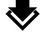

In [13]:
#!conda install -c conda-forge panel>=0.8.0 -y
# explore catalog graphically: experimental: https://intake.readthedocs.io/en/latest/gui.html
intake.gui.add('ASP_data_catalog.yml')
intake.gui

## observations

In [92]:
# view parameters and urlpath pattern
cat.obs.describe()

{'name': 'obs',
 'container': 'xarray',
 'plugin': ['zarr'],
 'driver': ['zarr'],
 'description': 'Observations to verify forecasts with. Most variables are from NOAA CPC, but geopotential height gh_500 is from ERA.',
 'direct_access': 'forbid',
 'user_parameters': [{'name': 'data',
   'description': 'data type',
   'type': 'str',
   'allowed': ['raw', 'anom'],
   'default': 'raw'},
  {'name': 'lead',
   'description': 'aggregation of leads in forecasts and time in observations',
   'type': 'str',
   'allowed': ['daily', 'biweekly'],
   'default': 'daily'},
  {'name': 'dim',
   'description': 'dimensionality of the data\n  geospatial contains lon and lat\n  country contains no lon and lat but aggregated data by country',
   'type': 'str',
   'allowed': ['geospatial', 'country'],
   'default': 'geospatial'}],
 'metadata': {'sources': ['http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.temperature/.daily/',
   'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/

In [93]:
# quick view on metadata
cat['obs'].discover()

{'dtype': None,
 'shape': None,
 'npartitions': None,
 'metadata': {'sources': ['http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.temperature/.daily/',
   'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/',
   'add-ERA-link'],
  'comment': 'gh_500 from ERA',
  'catalog_dir': '/glade/u/home/aspring/s2s_verification_climpred/',
  'dims': {'lat': 121, 'lon': 240, 'time': 8036},
  'data_vars': {'t2m': ['lat', 'lon', 'time'], 'tp': ['lat', 'lon', 'time']},
  'coords': ('lat', 'lon', 'time')}}

In [94]:
cat['obs'](data='anom', lead='daily', dim='geospatial').to_dask()

<xarray.Dataset>
Dimensions:    (lat: 121, lon: 240, time: 8036)
Coordinates:
    dayofyear  (time) int64 dask.array<chunksize=(8036,), meta=np.ndarray>
  * lat        (lat) float64 90.0 88.5 87.0 85.5 ... -85.5 -87.0 -88.5 -90.0
  * lon        (lon) float64 0.0 1.5 3.0 4.5 6.0 ... 354.0 355.5 357.0 358.5
  * time       (time) object 1999-01-01 00:00:00 ... 2020-12-31 00:00:00
Data variables:
    t2m        (time, lat, lon) float64 dask.array<chunksize=(574, 121, 240), meta=np.ndarray>
    tp         (time, lat, lon) float64 dask.array<chunksize=(574, 121, 240), meta=np.ndarray>

## forecasts

In [104]:
cat['ECMWF']

ECMWF:
  args:
    chunks: auto
    urlpath: /glade/campaign/mmm/c3we/jaye/S2S_zarr/ECMWF.raw.daily.geospatial.zarr
    use_cftime: true
  description: S2S hindcasts 2000-2019 of the ECMF model issued by ECMWF in the S2S
    project
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: /glade/u/home/aspring/s2s_verification_climpred/
    data:
      source: https://github.com/ecmwf-lab/climetlab-s2s-ai-challenge
    initializations:
      freq: weekly corresponding to Thursdays in 2020
      hindcast_type: on-the-fly
    model:
      overview: https://confluence.ecmwf.int/display/S2S/ECMWF+Model
      paper: still-to-add
    project_paper:
      authors: Vitart et al.
      title: The Subseasonal to Seasonal (S2S) Prediction Project Database
      url: https://journals.ametsoc.org/view/journals/bams/98/1/bams-d-16-0017.1.xml
      year: 2017


In [96]:
cat['ECMWF'](data='anom', lead='daily', dim='geospatial').to_dask()

<xarray.Dataset>
Dimensions:    (init: 1060, lat: 121, lead: 46, lon: 240, member: 11)
Coordinates:
    dayofyear  (init) int64 dask.array<chunksize=(97,), meta=np.ndarray>
  * init       (init) object 2000-01-02 00:00:00 ... 2019-12-31 00:00:00
  * lat        (lat) float64 90.0 88.5 87.0 85.5 ... -85.5 -87.0 -88.5 -90.0
  * lead       (lead) timedelta64[ns] 1 days 2 days 3 days ... 45 days 46 days
  * lon        (lon) float64 0.0 1.5 3.0 4.5 6.0 ... 354.0 355.5 357.0 358.5
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    gh_500     (member, init, lead, lat, lon) float64 dask.array<chunksize=(11, 1, 46, 121, 240), meta=np.ndarray>
    t2m        (member, init, lead, lat, lon) float64 dask.array<chunksize=(11, 1, 46, 121, 240), meta=np.ndarray>
    tp         (member, init, lead, lat, lon) float64 dask.array<chunksize=(11, 1, 46, 121, 240), meta=np.ndarray>

In [106]:
cat['NCEP']

NCEP:
  args:
    chunks: auto
    urlpath: /glade/campaign/mmm/c3we/jaye/S2S_zarr/NCEP.raw.daily.geospatial.zarr
    use_cftime: true
  description: S2S hindcasts 1999-2012 of the CFSv2 model issued by NCEP in the S2S
    project
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: /glade/u/home/aspring/s2s_verification_climpred/
    data:
      source: https://github.com/ecmwf-lab/climetlab-s2s-ai-challenge
    initializations:
      freq: weekly corresponding to Thursdays in 2020
      hindcast_type: on-the-fly
    model:
      overview: https://confluence.ecmwf.int/display/S2S/NCEP+Model
      paper: still-to-add
    project_paper:
      authors: Vitart et al.
      title: The Subseasonal to Seasonal (S2S) Prediction Project Database
      url: https://journals.ametsoc.org/view/journals/bams/98/1/bams-d-16-0017.1.xml
      year: 2017


# remote observations

With `intake` catalogs you can also access resources over the internet if someone curated a catalog. Try https://github.com/aaronspring/remote_climate_data!

In [64]:
#!conda install aiohttp -y

In [65]:
remote_obs = intake.open_catalog('https://raw.githubusercontent.com/aaronspring/remote_climate_data/master/master.yaml')

In [84]:
#remote_obs.walk(depth=1)

In [107]:
list(remote_obs)

['ocean', 'land', 'atmosphere', 'climate', 'shapefiles', 'regionmask']

In [108]:
list(remote_obs.climate)

['Global_Carbon_Budget', 'NOAA_correlation', 'NOAA_SST_anomaly_timeseries']

In [70]:
# check climate indices from https://www.psl.noaa.gov/data/correlation/
remote_obs.climate.NOAA_correlation.describe()

{'name': 'NOAA_correlation',
 'container': 'dataframe',
 'plugin': ['csv'],
 'driver': ['csv'],
 'description': 'climate indices from psl.noaa.gov/data/correlation',
 'direct_access': 'forbid',
 'user_parameters': [{'name': 'index',
   'description': 'name of the index',
   'type': 'str',
   'allowed': ['pna',
    'wp',
    'ea',
    'nao',
    'jonesnao',
    'soi',
    'nina3',
    'censo',
    'oni',
    'nina1',
    'nina4',
    'nina34',
    'np',
    'hurr',
    'pacwarm',
    'swmonsoon'],
   'default': 'nina34'}],
 'metadata': {'url': 'https://www.psl.noaa.gov/data/correlation/'},
 'args': {'urlpath': 'simplecache::https://psl.noaa.gov/data/correlation/{{index}}.data',
  'csv_kwargs': {'sep': '  ',
   'skiprows': 3,
   'skipfooter': 3,
   'names': ['year',
    'Jan',
    'Feb',
    'Mar',
    'Apr',
    'May',
    'Jun',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec'],
   'na_values': [-999.9, '-999.90', '-99.90', -99.9],
   'engine': 'python'}}}

In [86]:
# provided in pandas format
remote_obs.climate.NOAA_correlation(index='pna').read()

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1950,-3.65,-1.69,-0.06,-0.23,-0.40,-1.99,-0.82,0.79,-1.00,0.70,-1.74,-0.28
1,1951,-1.18,-2.11,-1.09,0.47,1.19,-0.54,-0.44,0.02,-0.08,0.43,0.21,-1.59
2,1952,-3.19,0.08,-0.69,0.89,-0.79,0.53,-1.57,0.77,0.40,1.05,0.77,0.63
3,1953,0.18,1.04,-0.44,0.78,1.14,-1.60,0.27,-1.15,-0.14,2.27,1.57,0.96
4,1954,-2.11,-0.48,-1.44,-2.86,0.65,0.09,-0.14,-0.11,-0.04,0.99,1.38,-0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2017,-0.29,-0.05,-0.03,0.14,-0.19,1.18,1.33,0.20,-0.32,-0.28,-1.98,0.58
68,2018,-0.14,-1.67,-1.16,-1.12,-1.09,0.66,-0.76,1.24,1.16,0.39,0.22,0.56
69,2019,0.42,-1.73,-0.05,-0.84,-0.17,0.24,0.62,1.16,1.62,-0.97,-0.07,-0.12
70,2020,-0.95,-0.07,-2.41,-1.38,0.27,0.86,1.20,1.80,0.59,-1.08,0.21,1.28


In [74]:
def monthly_csv_to_DataArray(df, freq="MS"):
    """Convert dataframes from NOAA catalog items to xr.DataArray.
    Example:
        >>> cat = intake.open_catalog('master.yaml')
        >>> df = cat.climate.NOAA_correlation.read()
        >>> da = monthly_csv_to_DataArray(df)
        >>> da
        <xr.DataArray> ...
    """
    import pandas as pd
    df = df.set_index("year")
    df = df.apply(pd.to_numeric, errors="coerce")
    initial = df.first_valid_index()
    if len(str(initial)) >= 4:
        initial = str(initial)[:4]
    initial = int(initial)
    return xr.DataArray(
        df.values.flatten(),
        dims="time",
        coords={
            "time": xr.cftime_range(str(initial), freq=freq, periods=df.values.size)
        },
    )

In [75]:
# convert to xarray
pna = monthly_csv_to_DataArray(remote_obs.climate.NOAA_correlation(index='pna').read())

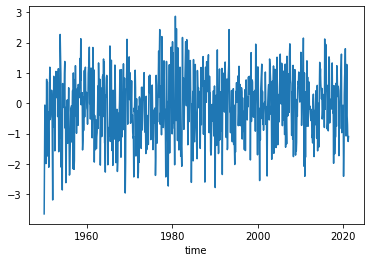

In [77]:
pna.plot()

## set cache directory

https://filesystem-spec.readthedocs.io/en/latest/features.html#caching-files-locally

In [111]:
# set defaults
import fsspec
cache_path = "my_caching_folder"
fsspec.config.conf["simplecache"] = {"cache_storage": cache_path, "same_names": True}

In [114]:
# provided in pandas format
remote_obs.climate.NOAA_correlation(index='pna').read()

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1950,-3.65,-1.69,-0.06,-0.23,-0.40,-1.99,-0.82,0.79,-1.00,0.70,-1.74,-0.28
1,1951,-1.18,-2.11,-1.09,0.47,1.19,-0.54,-0.44,0.02,-0.08,0.43,0.21,-1.59
2,1952,-3.19,0.08,-0.69,0.89,-0.79,0.53,-1.57,0.77,0.40,1.05,0.77,0.63
3,1953,0.18,1.04,-0.44,0.78,1.14,-1.60,0.27,-1.15,-0.14,2.27,1.57,0.96
4,1954,-2.11,-0.48,-1.44,-2.86,0.65,0.09,-0.14,-0.11,-0.04,0.99,1.38,-0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2017,-0.29,-0.05,-0.03,0.14,-0.19,1.18,1.33,0.20,-0.32,-0.28,-1.98,0.58
68,2018,-0.14,-1.67,-1.16,-1.12,-1.09,0.66,-0.76,1.24,1.16,0.39,0.22,0.56
69,2019,0.42,-1.73,-0.05,-0.84,-0.17,0.24,0.62,1.16,1.62,-0.97,-0.07,-0.12
70,2020,-0.95,-0.07,-2.41,-1.38,0.27,0.86,1.20,1.80,0.59,-1.08,0.21,1.28


In [115]:
import os
assert os.path.exists(f'{cache_path}/pna.data')